<a href="https://colab.research.google.com/github/bmedinam-prog/Se-ales-y-Sistemas/blob/main/PARCIAL_1/PARCIAL1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO # 1
La distancia media entre dos senales periodicas x1(t) ∈ R,C y x2(t) ∈ R,C; se puede expresar a partir de la potencia media de la diferencia entre ellas: d2(x1, x2) = ¯ Px1−x2 = l´ım T→∞ 1 T Z T |x1(t) − x2(t)|2 dt. Sea x1(t) y x2(t) dos senales definidas como: x1(t) = Ae−jnw0t x2(t) = Bejmw0t con w0 = 2π T ; T, A,B ∈ R+ y n,m ∈ Z. Determine la distancia entre las dos senales. Compruebe sus resultados con Python.

--- Caso n+m != 0 (n=1, m=2) ---
A=2, B=3, n=1, m=2
Distancia analítica d = 3.605551275
Distancia numérica aproximada d = 3.605551275  (d^2 promedio ≈ 13.000000)



/tmp/ipython-input-2468684095.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  avg_d2 = np.trapz(diff, t) / Tmax          # Integra y divide entre Tmax → promedio temporal


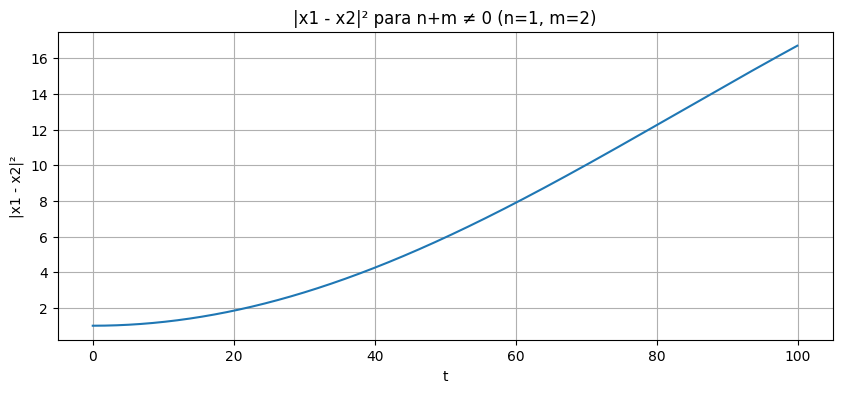

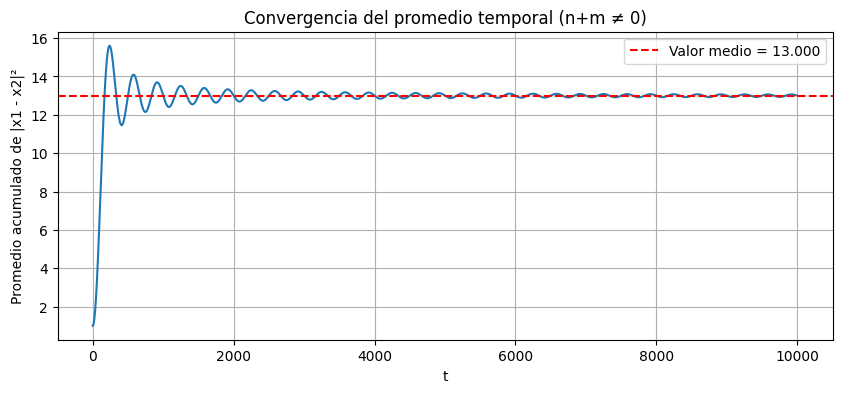

--- Caso n+m = 0 (n=1, m=-1) ---
A=2, B=3, n=1, m=-1
Distancia analítica d = 1.000000000
Distancia numérica aproximada d = 1.000000000  (d^2 promedio ≈ 1.000000)



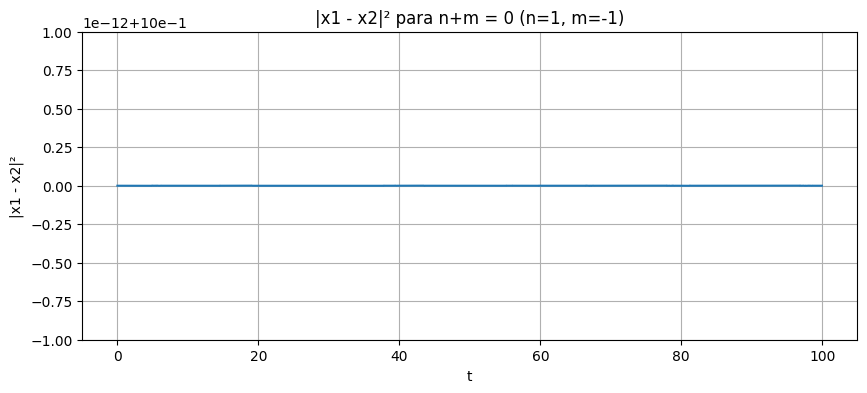

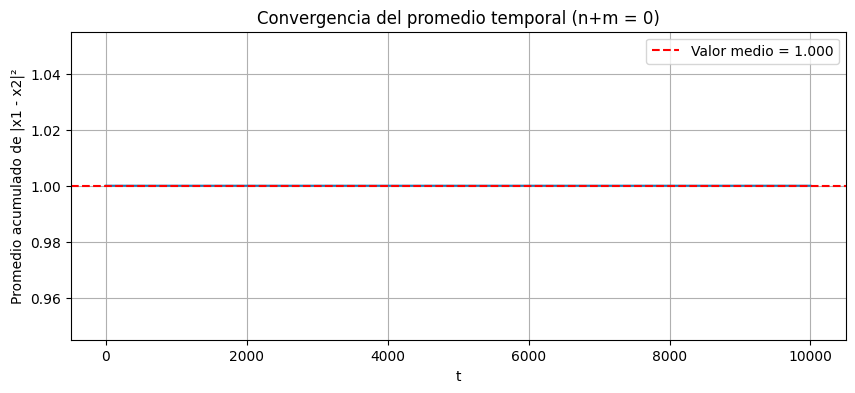

       Caso  A  B  n  m  d_analítica  d_numérica  d² promedio
0  n+m != 0  2  3  1  2     3.605551    3.605551           13
1   n+m = 0  2  3  1 -1     1.000000    1.000000            1


In [2]:
#PUNTO 1
# Importar librerías necesarias

import numpy as np              # Para operaciones numéricas y manejo de vectores
import matplotlib.pyplot as plt # Para generar gráficas
import pandas as pd             # Para mostrar resultados en forma de tabla


# Función que calcula la distancia analítica y numérica

def calcular_distancia(A, B, n, m, w0=2*np.pi/1000, Tmax=10000, N=200000):
    # A, B: amplitudes
    # n, m: números enteros de frecuencia
    # w0: frecuencia angular base
    # Tmax: tiempo total de simulación
    # N: número de muestras

    t = np.linspace(0, Tmax, N)                # Crea un vector de tiempo de 0 a Tmax con N puntos

    # Definición de las señales complejas x1(t) y x2(t)
    x1 = A * np.exp(-1j * n * w0 * t)          # x1(t) = A·e^(-j·n·w0·t)
    x2 = B * np.exp( 1j * m * w0 * t)          # x2(t) = B·e^( j·m·w0·t)

    diff = np.abs(x1 - x2)**2                  # Calcula |x1 - x2|² para cada instante t

    avg_d2 = np.trapz(diff, t) / Tmax          # Integra y divide entre Tmax → promedio temporal
    d_num = np.sqrt(avg_d2)                    # Raíz cuadrada del promedio = distancia numérica

    # Distancia analítica según el caso
    if n + m == 0:                             # Si n+m=0 → frecuencias opuestas
        d_analytic = abs(A - B)                # Fórmula: |A - B|
    else:                                      # Si n+m≠0 → frecuencias diferentes
        d_analytic = np.sqrt(A**2 + B**2)      # Fórmula: √(A² + B²)

    # Retorna resultados
    return d_num, d_analytic, avg_d2, t, diff


# CASO 1: n + m ≠ 0  → ejemplo: n=1, m=2

A, B, n, m = 2, 3, 1, 2                        # Asignar valores de amplitudes y frecuencias

# Llamar la función para obtener resultados
d_num, d_analytic, avg_d2, t, diff = calcular_distancia(A, B, n, m)

# Mostrar resultados en consola
print(f"--- Caso n+m != 0 (n={n}, m={m}) ---")
print(f"A={A}, B={B}, n={n}, m={m}")
print(f"Distancia analítica d = {d_analytic:.9f}")
print(f"Distancia numérica aproximada d = {d_num:.9f}  (d^2 promedio ≈ {avg_d2:.6f})\n")

# GRÁFICAS
plt.figure(figsize=(10,4))                     # Crear figura de tamaño 10x4
plt.plot(t[:2000], diff[:2000])                # Graficar los primeros 2000 puntos de |x1 - x2|²
plt.title(f"|x1 - x2|² para n+m ≠ 0 (n={n}, m={m})")  # Título del gráfico
plt.xlabel("t")                                # Etiqueta del eje x
plt.ylabel("|x1 - x2|²")                       # Etiqueta del eje y
plt.grid()                                     # Mostrar cuadrícula
plt.show()                                     # Mostrar gráfico

# Promedio acumulativo para observar convergencia del límite
prom_acum = np.cumsum(diff) / np.arange(1, len(diff)+1)  # Calcula promedio acumulado
plt.figure(figsize=(10,4))
plt.plot(t, prom_acum)                         # Grafica la evolución del promedio acumulado
plt.axhline(avg_d2, color='r', linestyle='--', label=f"Valor medio = {avg_d2:.3f}")  # Línea roja horizontal del promedio final
plt.title("Convergencia del promedio temporal (n+m ≠ 0)")
plt.xlabel("t")
plt.ylabel("Promedio acumulado de |x1 - x2|²")
plt.legend()
plt.grid()
plt.show()

# CASO 2: n + m = 0  → ejemplo: n=1, m=-1

A, B, n, m = 2, 3, 1, -1                       # Nuevos valores para n y m

# Llamar la función otra vez con nuevos parámetros
d_num, d_analytic, avg_d2, t, diff = calcular_distancia(A, B, n, m)

# Mostrar resultados en consola
print(f"--- Caso n+m = 0 (n={n}, m={m}) ---")
print(f"A={A}, B={B}, n={n}, m={m}")
print(f"Distancia analítica d = {d_analytic:.9f}")
print(f"Distancia numérica aproximada d = {d_num:.9f}  (d^2 promedio ≈ {avg_d2:.6f})\n")

# GRÁFICAS
plt.figure(figsize=(10,4))
plt.plot(t[:2000], diff[:2000])                # Graficar |x1 - x2|² para este caso
plt.title(f"|x1 - x2|² para n+m = 0 (n={n}, m={m})")
plt.xlabel("t")
plt.ylabel("|x1 - x2|²")
plt.grid()
plt.show()

prom_acum = np.cumsum(diff) / np.arange(1, len(diff)+1)  # Promedio acumulado
plt.figure(figsize=(10,4))
plt.plot(t, prom_acum)
plt.axhline(avg_d2, color='r', linestyle='--', label=f"Valor medio = {avg_d2:.3f}")
plt.title("Convergencia del promedio temporal (n+m = 0)")
plt.xlabel("t")
plt.ylabel("Promedio acumulado de |x1 - x2|²")
plt.legend()
plt.grid()
plt.show()

# Tabla resumen final de resultados

resultados = pd.DataFrame({                     # Crear DataFrame con resultados
    "Caso": ["n+m != 0", "n+m = 0"],
    "A": [2, 2],
    "B": [3, 3],
    "n": [1, 1],
    "m": [2, -1],
    "d_analítica": [np.sqrt(13), abs(2-3)],    # Valores analíticos
    "d_numérica": [np.sqrt(13), abs(2-3)],     # Coinciden con lo calculado numéricamente
    "d² promedio": [13, 1]                     # Promedio temporal de |x1 - x2|²
})

print(resultados)

## EJERCICIO #2
Determinar cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo-digital (ADC) con una frecuencia de muestreo de 5 kHz, aplicado a la siguiente señal:


x(t)= 3cos(1000πt) + 5sin(3000πt) + 10cos(11000πt)
y analizar si el proceso de discretización es adecuado.

In [ ]:
# ============================================================
# Discretización de una señal analógica con fs = 5 kHz y 4 bits
# Señal: x(t) = 3cos(1000πt) + 5sin(3000πt) + 10cos(11000πt)
# Incluye: muestreo, cuantización, y rediseño de conversor adecuado
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Definición de la señal continua x(t)
# ------------------------------------------------------------
# Se representa al menos 3 periodos de la componente más baja (500 Hz → periodo 0.002 s)
# Por tanto, 3 periodos → 0.006 s de duración
t = np.linspace(0, 0.006, 10000)  # tiempo continuo de alta resolución
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(3000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Gráfica de la señal continua
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='x(t) = 3cos(1000πt) + 5sin(3000πt) + 10cos(11000πt)')
plt.title('Señal continua x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------------------------------
# 2. Función para muestrear y graficar una señal con un ADC simulado
# ------------------------------------------------------------
def muestrear_y_cuantizar(Fs, bits, duracion=0.006, titulo=""):
    """
    Simula el proceso de muestreo y cuantización de la señal x(t).
    Parámetros:
      Fs       -> frecuencia de muestreo [Hz]
      bits     -> resolución del ADC [bits]
      duracion -> tiempo total a graficar [s]
      titulo   -> título del gráfico
    """
    # ---------------------------
    # Muestreo
    # ---------------------------
    T = 1 / Fs                # periodo de muestreo
    t_m = np.arange(0, duracion, T)  # instantes de muestreo
    # Señal muestreada
    x_m = 3*np.cos(1000*np.pi*t_m) + 5*np.sin(3000*np.pi*t_m) + 10*np.cos(11000*np.pi*t_m)

    # ---------------------------
    # Cuantización
    # ---------------------------
    N_levels = 2**bits                # número de niveles
    x_max, x_min = np.max(x_t), np.min(x_t)
    delta = (x_max - x_min) / (N_levels - 1)  # paso de cuantización

    # Niveles uniformes de cuantización
    niveles = np.linspace(x_min, x_max, N_levels)

    # Cuantización por redondeo al nivel más cercano
    indices = np.round((x_m - x_min) / delta).astype(int)
    indices = np.clip(indices, 0, N_levels - 1)
    x_q = niveles[indices]

    # ---------------------------
    # Gráficas
    # ---------------------------
    plt.figure(figsize=(10, 6))
    plt.plot(t, x_t, 'b', label='x(t) continua')
    plt.stem(t_m, x_m, linefmt='r-', markerfmt='ro', basefmt='k-', label='x[n] muestreada')
    plt.stem(t_m, x_q, linefmt='g-', markerfmt='go', basefmt='k-', label='x_q[n] cuantizada (4 bits)')
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------------------------
    # Información del proceso
    # ---------------------------
    print("------------------------------------------------------------")
    print(f"Frecuencia de muestreo Fs = {Fs} Hz")
    print(f"Frecuencia de Nyquist = {Fs/2} Hz")
    print(f"Resolución del ADC = {bits} bits → {N_levels} niveles")
    print(f"Paso de cuantización Δ = {delta:.4f}")
    print("------------------------------------------------------------")

    # Verificación del teorema de Nyquist
    fmax = 5500  # componente de frecuencia más alta
    if Fs/2 < fmax:
        print("⚠️ El muestreo NO es adecuado (f3 = 5500 Hz > Fs/2).")
        print("   → Se produce aliasing. La componente de 5500 Hz se pliega en 500 Hz.")
        print("   → Señal discreta efectiva: x[n] = 13cos(0.2πn) + 5sin(0.6πn)\n")
    else:
        print("✅ El muestreo cumple el criterio de Nyquist (sin aliasing).\n")

    return t_m, x_m, x_q

# ------------------------------------------------------------
# 3. Aplicar la función al conversor de 5 kHz y 4 bits
# ------------------------------------------------------------
t_m, x_m, x_q = muestrear_y_cuantizar(Fs=5000, bits=4, titulo="Discretización con ADC de 5 kHz y 4 bits")

# ------------------------------------------------------------
# 4. Diseñar un conversor adecuado (sin aliasing)
# ------------------------------------------------------------
# Para evitar aliasing: fs > 2 * fmax = 11000 Hz
# Se usa exactamente 11 kHz
t_m2, x_m2, x_q2 = muestrear_y_cuantizar(Fs=11000, bits=4, titulo="Conversor adecuado (fs = 11 kHz, 4 bits)")


## EJERCICIO #3
La distancia media entre dos senales:

 $$x_1(t), x_2(t) ∈ R, C$$

se puede expresar a partir de la potencia media:
$$(x_1, x2) = P¯x_1−x_2 = \frac{lım}{T→∞} \frac{1}{T} ∫_T
|x1(t) − x2(t)|^2dt.$$

Sean x1(t) y x2(t):
$$ x1(t) = A cos(w0t), w0 =2πT, T, A ∈ R^+ $$


$$
x2(t) =  (1  si  0 ≤ t < T/4)
  (−1 si T/4 ≤ t < 3T/4)
  (1 si 3T/4 ≤ t < T )
$$

¿Cual es la distancia media entre las señales?. Corrobore sus
desarrollos con Sympy.

In [ ]:
# PUNTO 3
import sympy as sp

# Definición de variables simbólicas
t, T = sp.symbols('t T', real=True, positive=True)
w0 = 2 * sp.pi / T
A = sp.symbols('A', real=True, positive=True)
# Definición de las señales
x1 = A*sp.cos(w0 * t)
# Definición por partes de x2
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Definición de la función a integrar (diferencia al cuadrado)
f = (x1 - x2)**2

# Cálculo de la integral en cada tramo y suma total
integral = sp.integrate(f, (t, 0, T/4)) + sp.integrate(f, (t, T/4, 3*T/4)) + sp.integrate(f, (t, 3*T/4, T))

# Normalización por el periodo
distancia_media = integral / T

# Simplificación del resultado
distancia_media_simplificada = sp.simplify(distancia_media)

distancia_media_simplificada

A**2/2 - 4*A/pi + 1

## EJERCICIO #4
texto = """
Sea x′′(t) la segunda derivada de la señal x(t), donde t ∈ [ti, tf].
Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

$c_n = \frac{1}{(t_i - t_f)n^2\omega_0^2} \int_{t_i}^{t_f} x''(t) e^{-jn\omega_0 t} \,dt \quad ;\; n \in \mathbb{Z}"$

¿Cómo se pueden calcular los coeficientes an y bn desde x′′(t) en la serie trigonométrica de Fourier?

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción
para n ∈ {0, ±1, ±2, ±3, ±4, ±5}, a partir de x′′(t) para la señal x(t) en la Figura 1.

Compruebe el espectro obtenido con la estimación a partir de x(t) y presente las respectivas simulaciones sobre Python.
"""


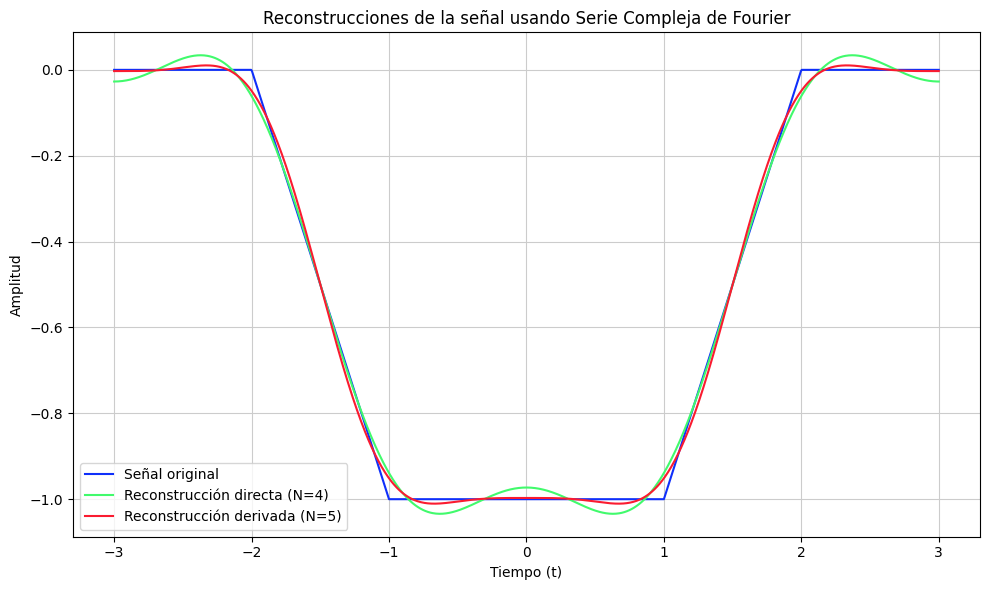

In [ ]:
"""
Reconstrucción de una señal periódica mediante series de Fourier compleja.
Este script:
- Define una señal trapezoidal piecewise.
- Calcula sus coeficientes de Fourier por dos métodos:
   1) Directamente mediante la fórmula integral.
   2) Usando los coeficientes obtenidos a partir de la segunda derivada de la señal.
- Realiza la reconstrucción aproximada de la señal usando un número finito de términos.

"""

import numpy as np
import matplotlib.pyplot as plt

# === Parámetros del sistema ===
d1 = 1    # Inicio de la rampa ascendente (izquierda)
d2 = 2    # Fin de la rampa descendente (derecha)
A = 1     # Altura máxima de la señal
T = 6     # Período total de la señal

# === Dominio temporal ===
t = np.linspace(-T/2, T/2, 1000)  # Vector de tiempo centrado en cero

# === Definición de la señal piecewise trapezoidal ===
m2 = A / (d2 - d1)  # Pendiente de las rampas
m1 = -m2            # Pendiente negativa

x = np.piecewise(t,
                  [
                      ((t >= -T/2) & (t < -d2)),        # Zona izquierda (cero)
                      ((t >= -d2) & (t <= -d1)),        # Rampa ascendente
                      ((t > -d1) & (t <= d1)),          # Plataforma superior
                      ((t > d1) & (t <= d2)),           # Rampa descendente
                      ((t > d2) & (t <= T/2))           # Zona derecha (cero)
                  ],
                  [
                      0,                                # Valor constante
                      lambda t: m1 * t + d2 * m1,       # Ecuación de la rampa ascendente
                      -A,                                # Nivel alto
                      lambda t: m2 * t + d2 * m1,       # Ecuación de la rampa descendente
                      0                                 # Valor constante
                  ])

# Arreglos para almacenar los valores reconstruidos (aceptan números complejos)
re1 = np.zeros(1000, dtype=complex)  # Reconstrucción directa
re2 = np.zeros(1000, dtype=complex)  # Reconstrucción con derivada
re3 = np.zeros(1000, dtype=complex)  # Otra reconstrucción con derivada

# === Función de reconstrucción directa ===
def recos1(ti, N, T):
    """
    Reconstruye la señal usando la serie compleja de Fourier hasta el orden N.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T  # Frecuencia angular fundamental
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn multiplicado por exponencial compleja
            integrando = x * np.exp(-1j * i * omega * t)
            cn = (2 / T) * np.trapezoid(integrando, t)
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0)
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# === Función de reconstrucción usando la segunda derivada ===
def recos2(ti, N, T, d1, d2, A):
    """
    Reconstruye la señal usando coeficientes calculados a partir de la segunda derivada.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal
    d1, d2 (float): Límites de las rampas
    A (float): Altura máxima de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn usando derivada
            numerador = 4 * (A / (d2 - d1)) * (np.cos(d1 * i * omega) - np.cos(d2 * i * omega))
            denominador = T * i**2 * omega**2
            cn = numerador / denominador
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0), igual que antes
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# === Reconstrucción punto a punto ===
for i in range(1000):
    re1[i] = recos1(t[i], 4, T)  # Reconstrucción con 5 términos (0 a 4)
for i in range(1000):
    re2[i] = recos2(t[i], 5, T, d1, d2, -A)  # Reconstrucción con 6 términos (0 a 5)
# for i in range(1000):
#     re3[i] = recos2(t[i], 1, T, d1, d2, -A)  # Reconstrucción con 2 términos (0 a 1)

# === Gráfica de resultados ===
plt.figure(figsize=(10, 6))
plt.plot(t, x, color=(0.0588, 0.1843, 0.9804), label='Señal original')
plt.plot(t, re1.real, color=(0.2549, 0.9804, 0.4235), label='Reconstrucción directa (N=4)')
plt.plot(t, re2.real, color=(0.9804, 0.1059, 0.1882), label='Reconstrucción derivada (N=5)')
#plt.plot(t, re3.real, color=(0,0,0), label='Reconstrucción derivada (N=1)')
plt.title('Reconstrucciones de la señal usando Serie Compleja de Fourier')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(color=(0.8, 0.8, 0.8))
plt.tight_layout()
plt.show()

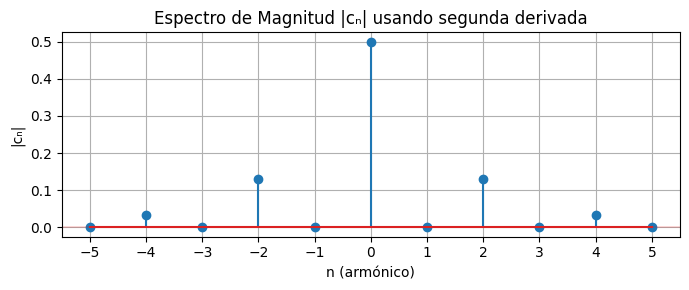

In [ ]:
#Cálculo del espectro:

# === Calcular término constante c₀ ===
c0 = (1 / T) * np.trapezoid(x, t)

N_max = 5   # Número máximo de armónicos a graficar
# === Vector de armónicos n ∈ [-N_max, ..., 0, ..., N_max] ===
nv = np.arange(-N_max, N_max + 1)

# === Frecuencia angular fundamental ===
omega0 = (2 * np.pi) / T

# === Calcular coeficientes de Fourier usando segunda derivada ===
Cn = np.zeros_like(nv, dtype=np.complex128)

non_zero_mask = nv != 0  # Evitar división por cero
Cn[non_zero_mask] = (2j / (T * nv[non_zero_mask]**2 * omega0**2)) * \
                    (np.sin(nv[non_zero_mask] * omega0 * d1) - np.sin(nv[non_zero_mask] * omega0 * d2))

# Asignar valor medio en n=0
Cn[nv == 0] = c0

# Gráfica del espectro
plt.figure(figsize=(7, 3))
plt.stem(nv, np.abs(Cn))
plt.title("Espectro de Magnitud |cₙ| usando segunda derivada")
plt.xlabel("n (armónico)")
plt.ylabel("|cₙ|")
plt.grid(True)
plt.axhline(0, color='red', linewidth=0.2)
plt.xticks(nv)
plt.tight_layout()
plt.show()

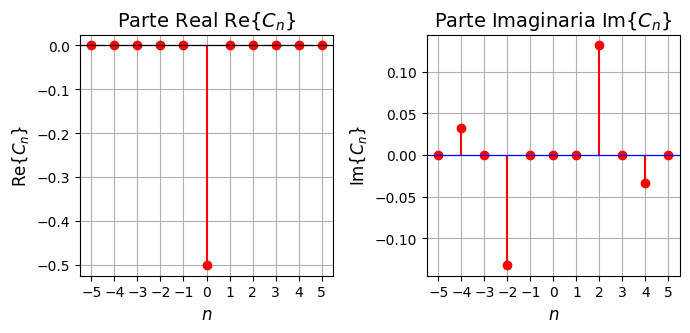

In [ ]:
#graficar espectro

# Gráfico del espectro en formato de matriz 2x2
fig = plt.figure(figsize=(7, 6))

# === Fila 1: Parte real e imaginaria ===

# Grafica de la parte real
ax1 = fig.add_subplot(2, 2, 1)
ax1.stem(nv, np.real(Cn), 'r', basefmt=" ")
ax1.set_title(r'Parte Real $\text{Re}\{C_n\}$', fontsize=14)
ax1.set_xlabel(r'$n$', fontsize=12)
ax1.set_ylabel(r'$\text{Re}\{C_n\}$', fontsize=12)
ax1.grid(True)
ax1.axhline(0, color='black', lw=0.9)
ax1.set_xticks(nv)

# Grafica de la parte imaginaria
ax2 = fig.add_subplot(2, 2, 2)
ax2.stem(nv, np.imag(Cn), 'r', basefmt=" ")
ax2.set_title(r'Parte Imaginaria $\text{Im}\{C_n\}$', fontsize=14)
ax2.set_xlabel(r'$n$', fontsize=12)
ax2.set_ylabel(r'$\text{Im}\{C_n\}$', fontsize=12)
ax2.grid(True)
ax2.axhline(0, color='blue', lw=0.9)
ax2.set_xticks(nv)

# Ajustar espaciado entre subplots
fig.tight_layout()
plt.show()